# Introduction

This project will examine the sentiment analysis aspect of text classification. The problem area is the classification of positive and negative tags to twitter statements. The Kaggle dataset [1] which will be analysed contains 1.6 million tweets and their corresponding sentiments.

###  1. Domain-specific area

Sentiment analysis is a crucial tool in understanding the emotions surrounding a topic of interest and are invaluable in explaining and predicting business and social phenomena such as product and brand recognition, customer loyalty/satisfaction, product sales and political election outcomes [2]. Among the many forms of social media platforms Twitter has emerged as a prominent sentiment sharing space with 313 million users on any given month. Users frequently express their opinions on products, events and party leaders, which results in huge quantities of data produced ready to be analysed. Understanding the psychology of the users can empower product managers and political parties to alter future plans and to minimise the risk of failures to great effect.

Sentiment analysis is used in a plethora of scenarios, for example [10]:
1.	Social media monitoring – around the launch of a new product or key event.
2.	Identifying unsatisfied customers – customer churn is costly and preventive measure are preferred.
3.	Monitoring employee feedback – useful in large organisations.
4.	Analysing survey responses – an effective measure for large-scale research programs.

A key domain of sentiment analysis on twitter revolves around product/brand perception and understanding the opinions/feelings of the consumer in real time [3]. Using this information companies can make data driven decisions to boost their sales and brand recognition. Sentiment analysis may be used to improve customer satisfaction by understanding key issues surrounding a product from a large portion of their consumer base to a greater degree than would typically be accessible from reviews on websites. Sentiment analysis allows companies to react with greater speed to potential issues and damage control effectively. This is especially important given how costly it can prove for a consumer to switch brands. Product managers can use this tool to theorise the success of a new product and monitor its receptiveness with the consumer base once it has been launched.

Sentiment analysis can also be used to further and improve upon marketing campaigns. For example, the number likes, shares and comments allow product managers to narrow down their selection of ad campaigns and predict to a certain extent their effectiveness. Likewise analysing the consumer sentiment towards certain features of a product, positive or negative, allows the company to direct its resources into meaningful endeavours whether to enhance a lacking feature or develop new ones which are currently trending [4]. Sentiment analysis can be used to track the effectiveness of a marketing campaign and compare it against previous endeavours. As such through trial and error companies can fine tune their advertisements to be wholly effective on their target base.

Human beings are highly social and vocal creatures. We say what we like and what we don’t like to our friends, family and anyone else who might listen. This creates a wealth of data which when analysed will reveals the honest opinions on any topic in question. As such sentiment analysis plays a key role in decoding this data into a digestible format.

### 2. Objectives

The objective of this project is to classify the sentiment of tweets taken from Twitter. The classification tags are either positive or negative and are already assigned to the tweets. As such this will be a supervised machine learning task. The success of this objective depends upon the accuracy of the classifier used as measured against the baseline. Ultimately the goal of this model is to successfully return the accurate sentiment of the tweet sampled at random from Twitter. 

The objectives limited in scope to this project are as follows.
1.	Develop a sentiment classification model which can beat the baseline.
2.	Test model on a new dataset, not part of the training process to determine the effect on the bias & variance.

The final goal would be to deploy this model into an application and test it in a live environment where improvement may be made and the purpose of model training is achieved. However this goal is beyond the scope of this small project.


#### Contributions of sentiment analysis

The contributions of sentiment analysis on social media posts or tweets are especially prevalent to marketing campaigns, product managers, news reactions and political candidates. The application of this tool in political campaigns has proven to be extremely effective in maintaining the support of the core voter base and reacting on beat to the opinions of the electorate, as demonstrated by Obama in his rise to presidency in 2008. His office used Salesforce.com to track “5.7 million messages – as many as 80,000 per day received by email, phone and through the campaign's website”. [5] Sorting and adapting this information has proved to be invaluable in shaping the strategy of his campaign. This methodology may be applied to any section retail or otherwise which derives its revenue from the public. A supplier which sells to collection of retail chains or the government will find little use in the opinions of the greater population. However even with this type of business filtered out the overwhelming majority of companies will benefit from a sentiment analysis model which can, with accuracy, classify the opinions of the public.

Sentiment analysis goes beyond just twitter and social media. The benefits are extended to product upselling opportunities by identifying the happiest customers in the consumer base. The employer’s ability to satisfy customers can also be monitored allowing companies to identify any weak links in their roster. Sentiment’s analysis also lends itself to the training of chatbots to identify and respond to certain moods. Another key contribution of sentiment analysis is the quick escalation it provides through the identification of unhappy customers which can be quickly and effectively resolved. This has the added benefit of reducing costly customer churn. Finally, the changes in customer opinion about a product or brand can be detected and used to keep the brand appreciation on track.

###  3. Description of the selected dataset

The dataset used for sentiment analysis is the sentiment140 dataset which is available on Kaggle [1]. It contains 1.6 million tweets extracted using the twitter API, which has been exported as a CSV file type. The dataset has last been updated 4 years ago. There are 6 features in this dataset as outlined below:

1.	sentiment: the polarity of the tweet (0 = negative, 4 = positive)
2.	id: The id of the tweet (1467810369)
3.	date: the date of the tweet (Mon Apr 06 22:19:45 PDT 2009)
4.	query: The query (lyx). If there is no query, then this value is NO_QUERY.
5.	user_id: creator of tweet (_TheSpecialOne_)
6.	tweet: the text of the tweet (Lyx is cool)

The sentiment and id features are of integer data types with all other features being comprised of object data types. There are no null entries in this dataset and the sentiment class is perfectly balanced at 800k negative tweets and 800k positive tweets. One caveat however is that the tweets are not perfectly categorized given that they have been tagged using the emojis present in the tweets. As such the models trained upon this dataset are expected to have a lower accuracy than otherwise expected. 

Twitter sentiment analysis is challenging due to the nature of social media, which is suitable to require many steps of data normalisation and requires the attention to all steps outlined in the assignment. The challenge lies in the informal lexicons that constitute the tweets. For one the grammar is highly inconsistent with abbreviated words, spelling errors and missing spaces being all too common. Additionally, tweets may contain twitter handles and other jargon such as website directories which provide little to no sentiment information. Henceforth tweets require considerable normalisation for effective classification.

### 4. Evaluation methodology 


The evaluation of the model will be judged purely on the combined accuracy of the positive and negative classes. This method is chosen due to the balanced nature of this dataset, or more accurately the sample chosen to evaluate. Recall and precision, while important in their own right, are not used due to the equal significance of both sentiment classes. One cannot say that in every instance the positive class is unequivocally superior over the negative class and vice versa. An additional valid evaluation metric is the f1 score which is the weighted average of precision and recall. It could be argued that the f1 score metric may be employed however in the presence of equally distributed classes accuracy is recommended over f1 score [6]. As such the accuracy is the chosen metric of evaluation.

Additionally, the accuracy metric will be accompanied by a confusion matrix. Its purpose is to provide a good visualisation of the four components of model evaluation to understand the strengths and weaknesses of the model.

Finally, and perhaps the most crucial metric is to verify the model’s ability to generalise well on unseen data. Given that one of the objectives of this project is to develop a model which can generalise well it is therefore crucial to test our model on such unseen data. This will be accomplished by using a sample derived from the original data frame.

## Implementation

### 5. Pre-processing 

In [1]:
# General use libraries.
import pandas as pd
import numpy as np
import collections
from collections import Counter
import random

# Language processing libraries.
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pywsd.utils import lemmatize_sentence
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tag import pos_tag

# SK learn & nltk algorithm libraries.
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from nltk import NaiveBayesClassifier
from nltk.metrics.scores import (precision, recall)

# Visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns

Warming up PyWSD (takes ~10 secs)... took 4.574942588806152 secs.


### Dataset Pre-processing

In this section the dataset will be processed into a useable format for later sentiment analysis.

In [2]:
# Assigning the raw data a dataframe and renaming columns for easier interpretation. 

df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', 
                       names=['sentiment', 'id', 'date', 'query', 'user_id', 'tweet'])

In [3]:
df.head()

,sentiment,id,date,query,user_id,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


#### Check for Null Entries

The dataset description states that no null entries are present within this dataset. As standard procedure this will be verified.

In [4]:
# Iterate through dataframe columns.
for column in df.columns:
    
    # If sum of null entries is 0, ignore column.
    if df[column].isnull().sum() == 0:
        continue
        
    # Display features with null entries.
    print(f'{column} - No. of NA entries: {df[column].isnull().sum()}')

No null entries present within the dataset.

#### Dropping Redundant Features

The columns id, date, query and user_id are not meaningful features and will not be used in sentiment analysis, therefore they will be discarded.

In [5]:
# Dropping redundant columns.

df.drop(['id', 'date', 'query', 'user_id'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   tweet      1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


#### Sampling the Dataset

The dataset is too large to be used on a standard computer, as such I will select a sample for this project. I will also ensure that the two classes positive and negative are equally distributed to enhance the model training process.

The selected sample size is 50k rows of positive and negative samples respectively. This sample size was selected to allow for responsive model training and the ability to fit all subsequent arrays into memory. 

In [7]:
# Sample size selected.
n = 50000

# Create dataframe of two equal slices from the original dataframe.
tweet_df = pd.concat([df.loc[df['sentiment'] == 4][:n], df.loc[df['sentiment'] == 0][:n]], ignore_index=True, sort=False)

# Examine new dataframe.
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  100000 non-null  int64 
 1   tweet      100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


#### Categorising the Sentiment Class

The sentiment feature is categorised as to allow subsequent model training to function without errors.

In [8]:
# Categorising sentiments.

tweet_df['sentiment'] = tweet_df['sentiment'].replace(4,'pos')
tweet_df['sentiment'] = tweet_df['sentiment'].replace(0,'neg')

#### Visualisation of Pre-processed Dataset

The graph below displays the distribution of both sentiment classes, which are as expected equal.

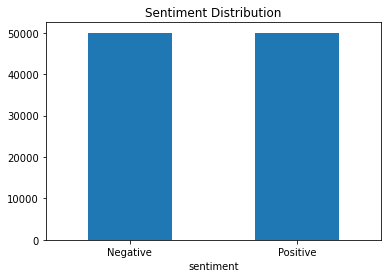

In [9]:
# Visualising sentiment distribution.

ax = tweet_df.groupby('sentiment').count().plot(kind='bar', title='Sentiment Distribution', legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
plt.show()

In [10]:
# Examine pre-processed dataframe.

tweet_df.head()

,sentiment,tweet
0,pos,I LOVE @Health4UandPets u guys r the best!!
1,pos,im meeting up with one of my besties tonight! ...
2,pos,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,pos,Being sick can be really cheap when it hurts t...
4,pos,@LovesBrooklyn2 he has that effect on everyone


The dataframe is now ready for the normalisation process.

### Text Normalisation

In this section the textual data will be normalised. This is especially important and challenging when processing tweets due to the nature of informal social text. This involves the removal hashtags, web addresses and emoji interpretation in addition to the usual punctuation and stopwords removal.

In order to process the emojis an emoji dictionary is constructed which will be used in conjunction with regex to identify and replace a pattern with an appropriate word i.e., key/value pair.

This dataset vocabulary contains both English and Spanish words which will be accounted for when removing stopwords.

In [11]:
emojis = {':)': 'smile', ':-)': 'smile', ';D': 'bigsmile', ':D': 'bigsmile', ':-D': 'bigsmile', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'smirk', ':-P': 'smirk', ':O': 'surprised',
          ':\\': 'annoyed', ":')": 'sadsmile', ':-/': 'skeptical', 
          ':^)': 'smile', '$_$': 'greedy', ':|': 'straightface', ':-|': 'straightface',
          '@@': 'eyeroll', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel', '=^.^=': 'cat'}

The function below normalises the textual data inputted via a dataframe.

The processing steps of the function are as follows:
1. Find and replace all emojis recognisable in the dictionary with the word 'emoji' and respective key value.
2. Create a counter stop word dictionary for the English and Spanish languages which make up these tweets. The counter dictionary is highly efficient and cuts down on processing time significantly.
3. Remove web addresses from text.
4. Remove twitter handles.
5. Remove all non alpha-numeric text.
6. Deal with negation by appending NOT_ prefix to negative words.
7. Any words with multiple repeating letters are shortened down to a maximum of two i.e. hellloooo -> helloo
8. Remove stopwords from text.
9. Remove any stand alone characters.
10. Lower case all text.
11. Lemmatize text according to its pos tag.

The function also allows for the output to be returned as either individual tokens or the normalised tweet.

There are a multitude of reasons for normalising the tweets in the manner described above. Firstly, the URLs, twitter handles/hashtags and stopwords were removed as they do not provide any useful information to sentiment analysis and removing these words results in a smaller vocabulary which is helpful in improving model training speed.

The emojis were replaced by a key/value pair in order to preserve this critical information for model training, otherwise this information would be lost when punctuations are processed and removed.

Punctuations are removed due the BoW textual representation which does not take into account the pattern or layout of the words in the sentence. Punctuations also do not add any useful information to sentiment analysis.

Stand alone characters are also removed due to vocabulary inflation and providing little to no sentiment information. Usually these words are a misspelled, for example ‘r’ - ‘are’.

Negation is handled by conjoining the original word with ‘NOT_’ to signify the semantic relationship to the unigram BoW model.

Another misspelling or exaggeration of words such as ‘yayyyy’ is corrected by allowing only a maximum of 2 consecutive characters. The benefit if that a uniform vocabulary is created containing only one copy of ‘yayy’ which improves the model’s classification ability.

The text is lemmatized according to its pos tag. This greatly improves the number of words lemmatized as opposed to the default lemmatizer pos. Lemmatization also improves model performance by reducing the size of the vocabulary given that all variations of the tokens are reduced to their basic forms.

The text is lower cased to reduce the vocabulary size which avoids multiple copies of the tokens which only differ by capitalisation. This clearly does not improve sentiment analysis and only inflates the vocabulary size.

In [12]:
def process_text(text, tokens_output=False):
    
    """
    This function normalises textual data and returns either a list of tokens or a list which preserves the 
    order of the input data.
    
    Inputs
    text: dataframe column containing textual data.
    tokens_output: if set to True will return the tokens of the inputted data. 
                   if set to False will return a list of the inputted data.
                   
    
    Output
    Returns the normalised tokens or list of sentences.
    """
    
    # Iterate through the dictionary and replace all emojis with their corresponding textual interpretations.
    for k, v in emojis.items():
        text = text.str.replace(k, 'emoji'+v, regex=False)
        
    # Inititate a counter stopwords dictionary.
    stopwords_dict = Counter(stopwords.words(['english', 'spanish']))
    
    # Remove all emails and websites from text.
    normalize_text = text.str.replace('((http:)[^ ]*|(https:)[^ ]*|( www\.)[^ ]*)', '')
    
    # Remove all twitter handles.
    normalize_text = normalize_text.str.replace('@[^\s]+', '')
    
    # Remove all non-numerical characters.
    normalize_text = normalize_text.str.replace('[^a-zA-Z0-9]', ' ')
    
    # Append NOT_ to specified negation words.
    normalize_text = [re.sub(r'\b(?:not|never|no|didnt)\b[\w\s]+[^\w\s]', lambda match: re.sub(r'(\s+)(\w+)', r'\1NOT_\2', 
                             match.group(0)), tweet, flags=re.IGNORECASE) for tweet in normalize_text]
    
    # Apply lower casing to text, remove one letter words, remove punctuation and limit same letter repetition to two
    normalize_text = [' '.join(re.sub(r'(.)\1+', r'\1\1', w) for w in s.lower().split() if len(w) > 1 
                               and w not in string.punctuation and w not in stopwords_dict) for s in normalize_text]
    
    # Return lemmatized list of sentences if token output set to false.
    if tokens_output is False:
        return [' '.join(lemmatize_sentence(line)) for line in normalize_text]
    
    # Tokenize the sentence if tokens output is set to true.
    else:
        tokens = word_tokenize(' '.join(w for w in normalize_text))

        # Initialise lemmatizer.
        lemmatizer = WordNetLemmatizer()
        
        # List for storing tokens.
        processed_tokens = []
        
        # Iterate through tokens and apply pos tagging.
        for token, tag in pos_tag(tokens):

            # Replace multiple consecutive letter with a maximum of two.
            token = re.sub(r'(.)\1+', r'\1\1', token)
            
            # Store pos tag in a variable.
            if tag.startswith('NN'):
                pos = 'n'
            elif tag.startswith('VB'):
                pos = 'v'
            else:
                pos = 'a'
                
            # Lemmatize token using the appropriate pos tag and store in a list.
            processed_tokens.append(lemmatizer.lemmatize(token, pos))
            
        return processed_tokens

This function will now be used to create normalised tokens and list of tweets in order to examine results.

In [13]:
# Normalising text into list of tweets.
processed_text = process_text(tweet_df['tweet'])

# Observe first ten processed tweets.
processed_text[:10]

['love guy best',
 'im meet one besties tonight cant wait girl talk',
 'thanks twitter add sunisa get meet hin show dc area sweetheart',
 'sick really cheap hurt much eat real food plus friend make soup',
 'effect everyone',
 'tell burst laugh really loud thanks make come sulk',
 'thans response ihad already find answer',
 'jealous hope great time vega like acm love show',
 'ah congrats mr fletcher finally join twitter',
 'respond stupid cat help type forgive error']

In [14]:
# Normalising text into list of tokens.
processed_tokens = process_text(tweet_df['tweet'], tokens_output=True)

# Observe first ten processed tokens.
processed_tokens[:10]

['love',
 'guy',
 'best',
 'im',
 'meet',
 'one',
 'besties',
 'tonight',
 'cant',
 'wait']

This concludes the normalisation process of the textual data. It is now ready for machine learning input. 

Textual representations will be performed at a later stage as required by the machine learning algorithm.

## 5. Baseline Performance

The baseline model from which further comparisons can be drawn will be created using the VADER sentiment analysis NLTK package. VADER is an easy to use and implement sentiment analysis model which is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. The VADER package itself is a lexicon and rule-based sentiment analysis tool that is specifically designed to be applied to social media text. 

The main reasons for using VADER as a baseline are as follows:
1.	No training data required.
2.	Especially attuned to social media text.
3.	Does not require the normalisation of text, the model can process emoticons, slangs, conjunctions, capital words, punctuations etc.

For the reasons stated above VADER will be used to classify the tweets and the ‘compound’ result will be used to classify the tweet as either positive or negative. It is important to note here that VADER also identifies neutral sentiments which are not part of this dataset.

The baseline performance will be calculated using the accuracy metric. VADER sentiment labels will be measured against the existing sentiment classes to provide the overall model accuracy. In the case of neutral VADER sentiments labels these will be marked as incorrect labels and marked accordingly. 

An important note to bear in mind while examining the end result of this baseline, the original tweets sentiments are likely to be incorrect themselves due to the twitter API categorisation technique which classified the tweets based upon their emojis. As such it is entirely possible that the VADER assessments are more accurate than the pre-existing classifications. Nevertheless, VADER is still a good baseline to test the trained model’s performance.
 

In [15]:
# Creating a copy of the original dataframe and dropping the original tweet column.

baseline_df = tweet_df.drop('tweet', axis=1).copy()

In [16]:
# Appending the normalised list of tweets to the new df as a column.

baseline_df['proc_txt'] = np.array(processed_text)

In [17]:
# Examine dataframe.

baseline_df.head()

,sentiment,proc_txt
0,pos,love guy best
1,pos,im meet one besties tonight cant wait girl talk
2,pos,thanks twitter add sunisa get meet hin show dc...
3,pos,sick really cheap hurt much eat real food plus...
4,pos,effect everyone


In [18]:
# Instantiating the VADER sentiment analyser. 
analyzer = SentimentIntensityAnalyzer()

# Create a new column with the compounded VADER sentiment label.
baseline_df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in baseline_df['proc_txt']]

Using the compound value we can now classify each tweet with one of the three VADER sentiment labels using the function below.

The reason for choosing a threshold of 0.05 for positive labels and 0.05 for negative labels is based upon the research and work of observed from the greater NLP community, such as ‘stackoverflow.com’ and ‘geeksforgeeks.com’ [7].

In [19]:
def categorise_sentiment(sentiment):
    """ 
    Categorise VADER sentiment using the compounded sentiment score into 
    one of three classes; positive, negative and neutral.
    
    To be applied to dataframe using .apply() method.
    
    """
    
    if sentiment <= -0.05:
        label = 'neg'
        
    elif sentiment >= 0.05:
        label = 'pos'
        
    else:
        label = 'neu'
        
    return label

In [20]:
# Classifying labels based upon sentiment compound score.

baseline_df['vader_sentiment'] = baseline_df['compound'].apply(categorise_sentiment)

In [21]:
# Creating a new column which measures the VADER sentiment against pre-existing labels.

baseline_df['is_equal'] = (baseline_df['sentiment'] == baseline_df['vader_sentiment'])

In [22]:
# Finished dataframe containing VADER compound score and label.

baseline_df.head()

,sentiment,proc_txt,compound,vader_sentiment,is_equal
0,pos,love guy best,0.8555,pos,True
1,pos,im meet one besties tonight cant wait girl talk,0.0000,neu,False
2,pos,thanks twitter add sunisa get meet hin show dc...,0.8020,pos,True
3,pos,sick really cheap hurt much eat real food plus...,-0.5829,neg,False
4,pos,effect everyone,0.0000,neu,False


The final step is to provide an accuracy score based upon the total True and False correct labels.

In [23]:
# Initialise counters for true and false.
true = 0
false = 0

# Iterate through tweet sentiments and increment score based upon result.
for sentiment in baseline_df['is_equal'].values:
    if sentiment == True:
        true+=1
    else:
        false+=1

In [24]:
print(f'Vader Sentiment analysis resulted in {true} correct tags and {false} inccorect tags.') 
print(f'Accuracy = {round(true/(n*2)*100,2)}%')
print(f'\nNumber of neutral tags = {baseline_df.vader_sentiment.str.count("neu").sum()}')
print(f'Number of positive tags = {baseline_df.vader_sentiment.str.count("pos").sum()}')
print(f'Number of negative tags = {baseline_df.vader_sentiment.str.count("neg").sum()}')

Vader Sentiment analysis resulted in 49848 correct tags and 50152 inccorect tags.
Accuracy = 49.85%

Number of neutral tags = 27101
Number of positive tags = 50305
Number of negative tags = 22594


The resulting accuracy score for the VADER assessment is just under 50%, which is no better than a coin toss. There are a number of factors which have contributed to this poor result as eluded to previously. The most critical factor being that the original tweets were most likely misclassified due to the reliance on emojis for sentiment labels. The second important factor is that VADER analyses the neutrality of a sentiment in addition to positivity and negativity. The chances of misclassification are therefore higher and has a noticeable effect on accuracy when a quarter of the dataset is classified as neutral. 

The baseline has now been set at 50% and subsequent trained models will attempt to beat this score.

# 6. First Analysis Approach

In this section the first of two supervised models will be created. 

The text representation used in the first model is the bag of words model or BoW for short. This form of text representation does not account for the order or structure of words within the document. The model is only concerned with the occurrence of the word in the ‘bag’. The intuition behind this is that similar documents, or tweets in this case, will contain similar words. Using the BoW model a vocabulary is constructed using tokens which have been previously normalised. Text normalisation is especially prevalent in a BoW model due to the sparse vector memory requirements which can make the modelling process very challenging for machine learning algorithms. It is therefore advised to not use the entirety of the BoW vocabulary in order to minimise these issues.

In order to prune the vocabulary the nltk.FreqDist() method is used to choose the top 1000 most informative words which will be used as the BoW model. This bag of words will then be used to create the features which will train the model. The features are comprised of a tuple, the first element containing the top 1000 words from the BoW and a True or False annotation signifying whether the word is present in the tweet. The second element is the class of the tweet i.e., positive or negative.

This feature set will then be split into training and testing batches and inputted into the Naïve Bayes classifier. The Naïve Bayes classifier is used due to its frequent recommendation for sentiment analysis in the NLP community. The NB classifier works well with the bag of words text representation model which will be employed in this project. 

The feature extraction function below is cited as follows: Russel-Rows(2021) 5.203 Sentiment analysis using supervised learning [Source code].

In [25]:
# select number of tokens.
N = 1000

# Create frequency distribution from all tokens
freq_tokens = nltk.FreqDist(processed_tokens)

# Get the top most frequent words as selected by N
word_features = list(freq_tokens)[:N]

# Extract features from tweet.
def document_features(document): 
    document_words = set(document) 
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [26]:
# Create a list of tuples comprised of the tweet and sentiment label.

tweets = [(word_tokenize(tweet), tweet_df['sentiment'][idx]) for (idx, tweet) in enumerate(tweet_df['tweet'])]

With the feature sets and tweets ready to be analysed I will use a function conduct the model training and testing process.

In [27]:
def nb_classifier(text, train_test_split):
    
    """
    This function uses Naive Bayes to classify a list of tuples comprised 
    of text and sentiment labels and returns the accuracy, the confusion matrix, recall, 
    precision, f-measure per class and the most informative features of the model.
    
    Inputs
    Text: list of tuples comprised of text and label as first and second elements respectively.
    train_test_split: float number to dictate the split size for the train/test batches.
    
    Return: Displays the accuracy metric, precision, recall, f1-statistic and the most important 
    features of the model.
    """
    
    
    # Create the feature sets using the pruned vocabulary and sentiment label for each tweet.
    featuresets = [(document_features(tweet), category) for (tweet, category) in text]

    # Shuffle the feature set for each iteration.
    random.shuffle(featuresets)

    # Assign the test set batch size based upon the input.
    test_set = featuresets[int(len(featuresets)*train_test_split):]
    
    # Print the size of the test set.
    print(f'Length of Test set = {len(test_set)}')

    # Assign the train set batch size based upon the input.        
    train_set = featuresets[:int(len(featuresets)*train_test_split)]
    
    # Print the size of the training set.
    print(f'Length of Train set = {len(train_set)}\n')

    # Train the NB classifier.
    NBclassifier = nltk.NaiveBayesClassifier.train(train_set)

    # Test the model and append the accuracies of the model to the list.
    print(f'Accuracy = {round(nltk.classify.accuracy(NBclassifier, test_set)*100,4)}%\n')

    # Lists for storing the actual and predicted labels
    test_result = []
    gold_result = []

    # Iterate through test set and append the predicted and actual labels to the list.
    for i in range(len(test_set)):
        test_result.append(NBclassifier.classify(test_set[i][0]))
        gold_result.append(test_set[i][1])
    
    # Use lists to create a confusion matrix and print result.
    conf_matrix = nltk.ConfusionMatrix(gold_result, test_result)
    print(conf_matrix)

    # Create a collection dictionary for storing the predicted and actual labels.
    actual_results = collections.defaultdict(set)
    predict_results = collections.defaultdict(set)

    # Iterate through the test set and add to dictionary the actual and observed labels.
    for i, (feats, label) in enumerate(test_set):
        actual_results[label].add(i)
        observed = NBclassifier.classify(feats)
        predict_results[observed].add(i)

    print(f"Positive class Precision: {round(nltk.precision(actual_results['pos'], predict_results['pos'])*100,2)}%")
    print(f"Positive class Recall: {round(nltk.recall(actual_results['pos'], predict_results['pos'])*100,2)}%")
    print(f"Positive class F-measure: {round(nltk.f_measure(actual_results['pos'], predict_results['pos'])*100,2)}%\n")

    print(f"Negative class Precision: {round(nltk.precision(actual_results['neg'], predict_results['neg'])*100,2)}%")
    print(f"Negative class Recall: {round(nltk.recall(actual_results['neg'], predict_results['neg'])*100,2)}%")
    print(f"Negative class F-measure: {round(nltk.f_measure(actual_results['neg'], predict_results['neg'])*100,2)}%\n")

    # Show the most informative words in the model.    
    NBclassifier.show_most_informative_features(15)

In [28]:
# Running the model.

nb_model = nb_classifier(tweets, train_test_split=0.8)

Length of Test set = 20000
Length of Train set = 80000

Accuracy = 70.505%

    |    n    p |
    |    e    o |
    |    g    s |
----+-----------+
neg |<6454>3487 |
pos | 2412<7647>|
----+-----------+
(row = reference; col = test)

Positive class Precision: 68.68%
Positive class Recall: 76.02%
Positive class F-measure: 72.17%

Negative class Precision: 72.79%
Negative class Recall: 64.92%
Negative class F-measure: 68.63%

Most Informative Features
         contains(tummy) = True              neg : pos    =     27.2 : 1.0
        contains(lonely) = True              neg : pos    =     26.9 : 1.0
          contains(boom) = True              pos : neg    =     20.4 : 1.0
       contains(welcome) = True              pos : neg    =     17.6 : 1.0
        contains(cancel) = True              neg : pos    =     16.3 : 1.0
          contains(ache) = True              neg : pos    =     16.1 : 1.0
         contains(sadly) = True              neg : pos    =     15.5 : 1.0
           contains(sa

# 7.1 Evaluation

The accuracy of the model is roughly 69-70% depending on the shuffling process. This score is above the baseline, which stands at roughly 50% yet is still somewhat underwhelming. The foremost reason for this poor performance in my opinion is due to the unigram feature representation. The top most informative words provide a clear example of this. Words like female, throat and 22 are categorised predominantly as negative words which seems rather odd and highly variable to the sample taken from the original dataframe. 

Interpreting the precision/recall for each class:
Most tweets that are positive are correctly identified as such given the 76% recall. This means that there are few false negatives in the positive class. However, if a tweet is positively labelled it has only about 66% likelihood to be correct. This leads to roughly 34% false positives for the positive label.

The opposite is true for the negative class. Any tweet identified as negative is 72% likely to be correct, good precision. The recall however is very low at 62% meaning that many tweet identified as negative as incorrectly classified. The low recall results in 38% false negatives for the negative label. 
The f1 metric only provides us with the harmonic mean of the recall and precision per class. The f1 metric is higher in the positive class which is a result of the slightly better precision and recall in that class. From this we can discern tat the model has a slight bias toward the positive class. 

The bias towards the positive class can be the result of an overabundance of negatively classed tokens in the most informative features. Out of the top 15 most informative words, only 4 are more likely to occur in the positive class as opposed to the negative class. This can explain the higher precision and lower recall for the negative class. 

On a final note, while the accuracy of the model is rather low at 70%, it is important to note that human interpretation is only accurate about 80% of the time [8]. Also as mentioned previously the tweets have been categorised using emojis only, resulting in possibly incorrect labels.

### Second Test Set

It is important for any model trained to be able to predict multiple tests sets and enure it has a low variance. This will be performed using a sample taken from the original 1.6 million tweets and analysing the sentiment.

In [29]:
# Sampling the original dataframe.
test_df = df.sample(frac=0.02, replace=False, random_state=1).reset_index(drop=True)

# Categorising sentiments.
test_df['sentiment'] = test_df['sentiment'].replace(4,'pos')
test_df['sentiment'] = test_df['sentiment'].replace(0,'neg')

In [30]:
# Normalising the new dataset.

test_set = process_text(test_df['tweet'], tokens_output=True)

In [31]:
# Create frequency distribution from all tokens.
freq_tokens = nltk.FreqDist(test_set)

# Get the most frequent words as dictated by value of N.
word_features = list(freq_tokens)[:N]

In [32]:
# Create a list of tuples comprised of tweet and sentiment label.

test_tweets = [(word_tokenize(tweet), test_df['sentiment'][idx]) for (idx, tweet) in enumerate(test_df['tweet'])]

In [33]:
# Test second model.

nb_classifier(test_tweets, train_test_split=0.8)

Length of Test set = 6400
Length of Train set = 25600

Accuracy = 69.2812%

    |    n    p |
    |    e    o |
    |    g    s |
----+-----------+
neg |<2036>1168 |
pos |  798<2398>|
----+-----------+
(row = reference; col = test)

Positive class Precision: 67.25%
Positive class Recall: 75.03%
Positive class F-measure: 70.93%

Negative class Precision: 71.84%
Negative class Recall: 63.55%
Negative class F-measure: 67.44%

Most Informative Features
         contains(fever) = True              neg : pos    =     19.2 : 1.0
       contains(stomach) = True              neg : pos    =     17.1 : 1.0
           contains(sad) = True              neg : pos    =     15.4 : 1.0
       contains(welcome) = True              pos : neg    =     13.2 : 1.0
    contains(appreciate) = True              pos : neg    =     12.9 : 1.0
      contains(headache) = True              neg : pos    =     11.7 : 1.0
      contains(congrats) = True              pos : neg    =     11.3 : 1.0
          contains(bla

The second test performs about the same as the first. Once again the most informative words are negative. The recall and precision balues are also very similar to the first test. This test was conducted multiple times with larger and smaller sample sizes, all of which seemingly had no impact on the the accuracy of the model. 

# 8. Second Analysis Approach

The second approach to sentiment analysis will employ the use of scikit.learn libraries to transform the dataset into TF-IDF textual representation and use a number of machine learning algorithms to train and evaluate the test set.
In the previous section the BoW feature vector was used for sentiment analysis containing only unigrams. The drawbacks of the BoW model is that the term ordering is not taken into account resulting in the semantic of ‘not great’ to be represented as ‘not’ and ‘great’ which is incorrect. This issue however can be rectified using n-grams. Another drawback of this textual representation is the size of sparse matrix which expands as more text data is added and the vocabulary increases.

The TF-IDF feature vector is a numerical statistic that reflects the importance of a word in a document or corpus. The term frequency here has the same meaning as in the BoW model. The Inverse Document Frequency is the rarity of the term in the document. Together the TF-IDF reveals the important words in a document. The model can also ignore misspelled words by the use of n-grams. Misspelled words will have a very low importance in TF-IDF and will therefore be ignored. 

The process for model training and testing will be as follows:
Splitting the data into test/train partitions, apply TF-IDF and vectorise, transform vectors into dense arrays and train/test on a multiple models.

In [34]:
# Assign X to the independant variable.
X = processed_text

# Assign y to the dependant variable.
y = tweet_df['sentiment']

# Split the data into test/train partitions using an 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

The maximum number of TF-IDF features is capped at 10k using both unigrams and bigrams. The maximum number is selected due to hardware limitations resulting in memory errors due to matrix size. It was possible to use all features if only unigrams were allowed however I felt it necessary to use bigrams for this task due to the reliable performance gain associated with them.

In [35]:
# Use sklearn library to perform TF-IDF using bigrams and retrieving the top 10000 important words.
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000)

# Fit the vectoriser to X_train only.
vectoriser.fit(X_train)

print(f'No. of feature_words: {len(vectoriser.get_feature_names_out())}')

No. of feature_words: 10000


In [36]:
# Transform independant variables into feature vectors.
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

Before applying the variables into machine learning algorithms the feature vectors must be transformed into dense arrays.

In [37]:
# Converting vectors into dense arrays.

X_train = X_train.toarray()
X_test = X_test.toarray()

In order to streamline the model testing and evaluation process a function will be used to predict and output the classification report and confusion matrix.

In [38]:
def evaulate_model(model):
    """
    Function for evaluation of a model which has been been fitted on the independant and dependant train batches.
    
    Input: pre-fitted model.
    
    Output: classifiaction report and confusion matrix.
    """
    
    # Predict the test set.
    y_pred = model.predict(X_test)
    
    # Ouput classification report.
    print(classification_report(y_test, y_pred))
    
    # Create a confusion matrix using sk learn.
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Create group names for the heatmap confusion matrix.
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    
    # Flatten and format confusion matrix count values.
    group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
    
    # Flatten and format confusion matrix percentage values.
    group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    
    # Add label for each group.
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    
    # Reshape the flattened labels in confusion matrix format.
    labels = np.asarray(labels).reshape(2,2)
    
    # Output the confusion matrix.
    sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

Multiple models will now be evaluated and contrasted.

This is not an exhaustive list of machine learning models that may be applied to this classification task, however due to model training time more complex models were not used.

              precision    recall  f1-score   support

         neg       0.77      0.72      0.74      9887
         pos       0.74      0.78      0.76     10113

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000



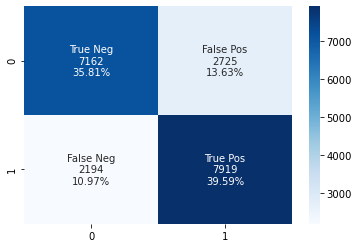

In [39]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
evaulate_model(bnb)

              precision    recall  f1-score   support

         neg       0.75      0.75      0.75      9887
         pos       0.76      0.75      0.75     10113

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000



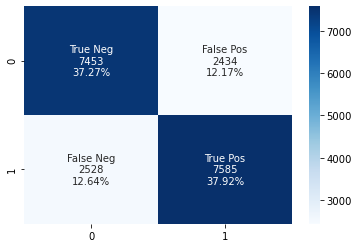

In [40]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
evaulate_model(mnb)

              precision    recall  f1-score   support

         neg       0.73      0.58      0.65      9887
         pos       0.66      0.79      0.72     10113

    accuracy                           0.69     20000
   macro avg       0.69      0.69      0.68     20000
weighted avg       0.69      0.69      0.68     20000



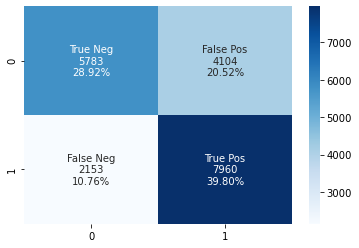

In [41]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
evaulate_model(gnb)

C:\Users\Stas\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         neg       0.75      0.73      0.74      9887
         pos       0.74      0.76      0.75     10113

    accuracy                           0.75     20000
   macro avg       0.75      0.74      0.74     20000
weighted avg       0.75      0.75      0.75     20000



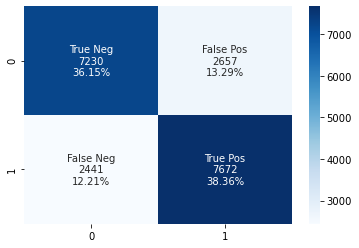

In [51]:
lr = LogisticRegression(max_iter=10)
lr.fit(X_train, y_train)
evaulate_model(lr)

              precision    recall  f1-score   support

         neg       0.71      0.62      0.66      9887
         pos       0.67      0.75      0.71     10113

    accuracy                           0.69     20000
   macro avg       0.69      0.69      0.69     20000
weighted avg       0.69      0.69      0.69     20000



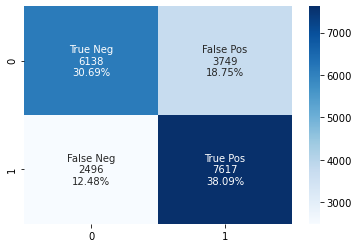

In [54]:
forest = RandomForestClassifier(max_depth=3, random_state=0)
forest.fit(X_train, y_train)
evaulate_model(forest)

# 7.2 Evaluation

Note the evaluation of the first model using BoW can be found in that section.

There is a tie in terms of the best performing model for sentiment analysis when comparing accuracy alone. These are the Bernoulli Naïve Bayes, the Multinomial Naïve Bayes and Logistic Regression which have all achieved an accuracy of 75%. Therefore, a closer examination of the other metrics will be required to identify the best model. 

Multinomial Naïve Bayes is the most well-rounded model, achieving a score of 75% for almost all metrics for either class. Given that in this instance there is no cost or emphasis to misclassification of one class over another a balanced error rate is permissible. 
The accuracy for this model is 75% which is roughly 5% better than the BoW approach. This increase in accuracy can be attributed to two key differences in classification. No.1 is that a TF-IDF textual representation was used which captures the importance of words within the corpus and the use of bigrams. This has allowed the model to outperform the unigram BoW model in almost every regard. 

In both sentiment  classification approaches there is a clear improvement over the baseline, which stands at 50%.

# 9. Conclusions

### Summary
The sentiment analysis task was successful when compared to the VADER sentiment baseline. 
As alluded to previously this baseline has classified a large number of tweets as neutral which, in some respect is more accurate of the real sentiment compared to the existing one in the dataset. The baseline in this respect is compromised and the accuracy should be higher.

Upon further reflection I have come to the realisation that the entire dataset is subpar in quality due to the inaccurate sentiments applied to the tweets which were classified based upon their expressed emojis.

### Possible Model Improvements
The normalisation of the dataset was in my opinion effective and efficient in processing speed. However, having examined a few articles with regards to stopwords it has come to my attention that it is not always necessary to remove them for sentiment analysis. [9] Stop words should only be removed if there is an increase in performance. With regards to sentiment analysis stopwords removal can be problematic if the context of the sentence is affected. In a BoW model this can be beneficial due to the reduced vocabulary and performance increase, however in a Word2Vec model where the semantics of text are vital then stopword removal can lead to ambiguous results. Furthermore, another key improvement to the normalisation process would be to grammatically correct the text before analysis. There are a plethora of conjoined words and misspellings which deteriorate the model’s vocabulary and consequently its ability to accurately classify sentiments.

The classifiers used were both BoW variations, being the standard BoW model and TF-IDF. The first model performed decently well though clear improvements could have been made through the use of bigrams and trigrams to capture some semantic meaning of the tweets. Furthermore, better feature selection can be employed to improve performance through the concept of information gain. Neutral words which provide no meaning can be removed from the feature sets and only classify the sentiment rich words. Lastly while TF-IDF performed quite well using bigrams an improvement may be made by using a semantic textual representation such as Word2vec.

The results for both classification models are respectable given the dataset and its problematic sentiment tags. This can be attributed to the robust normalisation process and having removed and replaced meaningless data like URL and twitter hashtags.

### Contribution to Domain Area

The bigram TF-IDF model is effective at sentiment analysis and can be employed to discern the sentiments of tweets. While the model is not as accurate as initially expected it can still give a good indication of sentiment and may be used in an ensemble to more accurately capture the sentiment within the tweets.

### Model Reproducibility
Finally, both models are easily reproducible given the code available in this report. All libraries are easily installed and may be verified through the accompanying requirement.txt file.

Note to reader: I am not as well informed to comment on other libraries bar the two approaches undertaken in this project i.e. NLTK and sk-learn or the reproducibility of this code in other languages bar python.

# References

[1] Kaggle.com. 2021. Sentiment140 dataset with 1.6 million tweets. [online] Available at: <https://www.kaggle.com/kazanova/sentiment140> [Accessed 12 December 2021].

[2] Zimbra, D., Abbasi, A., Zeng, D. and Chen, H., 2018. The State-of-the-Art in Twitter Sentiment Analysis. ACM Transactions on Management Information Systems, 9(2), pp.1-29.

[3] Benson, H., 2021. 4 Benefits of Twitter Sentiment Analysis for Your Business | Scraping Robot. [online] Scraping Robot. Available at: <https://scrapingrobot.com/blog/twitter-sentiment-analysis/> [Accessed 12 December 2021].

[4] 2021. [online] Available at: <https://www.pyoneer.io/post/5-reasons-why-sentiment-analysis-is-important/?utm_source=linkedinstefan&utm_medium=linkedinarticle&utm_campaign=realreasonwhysentiment> [Accessed 12 December 2021].

[5] SchectmanReporter, J., 2021. Obama's Campaign Used Salesforce.com To Gauge Feelings of Core Voters. [online] WSJ. Available at: <https://www.wsj.com/articles/BL-CIOB-1295> [Accessed 20 December 2021].

[6] Medium. 2021. Accuracy vs. F1-Score. [online] Available at: <https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2#:~:text=Accuracy%20is%20used%20when%20the,as%20in%20the%20above%20case.> [Accessed 20 December 2021].

[7] GeeksforGeeks. 2021. Python | Sentiment Analysis using VADER - GeeksforGeeks. [online] Available at: <https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/> [Accessed 22 December 2021].

[8] InformationWeek. 2021. Expert Analysis: Is Sentiment Analysis an 80% Solution?. [online] Available at: <https://www.informationweek.com/government/expert-analysis-is-sentiment-analysis-an-80-solution-> [Accessed 25 December 2021].

[9] Medium. 2021. Why is removing stop words not always a good idea. [online] Available at: <https://medium.com/@limavallantin/why-is-removing-stop-words-not-always-a-good-idea-c8d35bd77214> [Accessed 26 December 2021].

[10] Qualtrics. 2022. Sentiment Analysis: Definition & Best Practices | Qualtrics. [online] Available at: <https://www.qualtrics.com/uk/experience-management/research/sentiment-analysis/> [Accessed 3 January 2022].